# Lecture 3a

## Variance of Least Sqaures Estimation

This example will demonstrate the variance of the least squares estimator

<!-- 

Read more: https://html.com/tags/comment-tag/#ixzz5Lox9uP4Q $$E[y_0 - \hat f(x_0)]^2 = \text{Var}(\hat f(x_0) + [\text{Bias}(\hat f(x_0))]^2 +\text{Var}(\epsilon)$$

-->

$$Y=\beta_0 + \beta_1 X + \epsilon$$


In [8]:
set.seed(1) #set random seed so that the simulation is reproducible

n <- 100 #number of observations per sample

b0 <- 2
b1 <- 3

x <- 1:n # specify the predictors


e <- rnorm(n) #draw S samples of errors
y <-b0 + b1*x + e #generate the samples

lm.fit=lm(y~x) #fit the linear model
summary(lm.fit) #display


Call:
lm(formula = y ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.34005 -0.60584  0.01551  0.58514  2.29747 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.131666   0.181897   11.72   <2e-16 ***
x           2.999549   0.003127  959.21   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9027 on 98 degrees of freedom
Multiple R-squared:  0.9999,	Adjusted R-squared:  0.9999 
F-statistic: 9.201e+05 on 1 and 98 DF,  p-value: < 2.2e-16


## The Statistical Properties of the Least Squares Estimates 

This example will demonstrate the variance of the least squares estimator

<!-- 

Read more: https://html.com/tags/comment-tag/#ixzz5Lox9uP4Q $$E[y_0 - \hat f(x_0)]^2 = \text{Var}(\hat f(x_0) + [\text{Bias}(\hat f(x_0))]^2 +\text{Var}(\epsilon)$$

-->

$$Y=\beta_0 + \beta_1 X + \epsilon$$



In [12]:
set.seed(1)
S <- 100 #number of samples
n <- 100 #number of observations per sample

b0 <- 2
b1 <- 3

e <- replicate(S,rnorm(n)) #draw S samples

x <- 1:n

y <- b0 + b1*x + e

bh=matrix(,2,S) #initialize matrix to store estimates of beta

for (s in 1:S){
    lm.fit=lm(y[,s]~x) # estimate the linear model on the sample s.
    bh[1:2,s] <- coef(lm.fit)   #store the estimates                       
}

bh0=bh[1,]
bh1=bh[2,]

Notice that each estimate is different. This is due to the randomness in each of the training samples. We can see this in histograms for $\hat \beta_0$ amd $\hat \beta_1$.

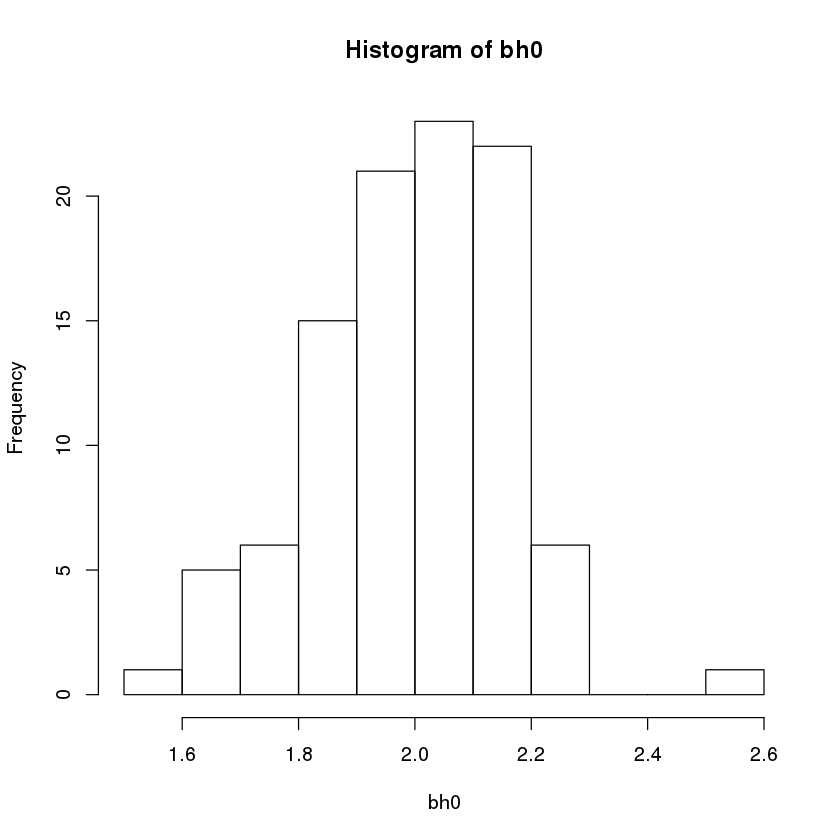

In [13]:
hist(bh0)

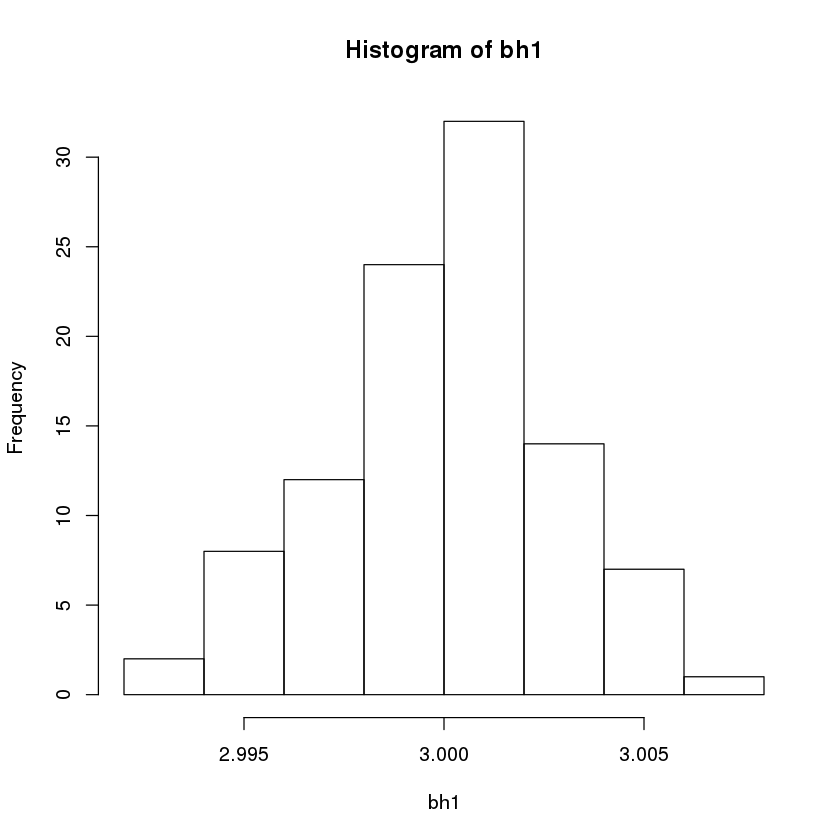

In [14]:
hist(bh1)

### Least Squares is unbiased
The average sample mean is very close to the true mean of 0. 

In [15]:
mean(bh0)
mean(bh1)

[1] 1.996534

[1] 2.999939

If we had infinite observations per sample (try say, $n=1000000$), it would be even closer.

### Variance of Least Squares

We can calculate the sample variance of the estimates.

In [16]:
var(bh0)
var(bh1)

[1] 0.02764308

[1] 7.627239e-06

and there standard deviation

In [17]:
sd(bh0)
sd(bh1)

[1] 0.1662621

[1] 0.002761746

These are calculated by taking the variance of estiuamtes from **many** samples. But in reality, we only have one sample with a finite number of observations. So how do we get this measure?

Go back to the first regression table above **for just a single sample**. Notice that there is a reported standard error (just beside the estimates). This was calculated using only one dataset given known formulas for the standard error.
